# Wgranie bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

pd.options.display.float_format = '{:.2f}'.format

# Propozycje hipotez
    1. Podział na kontynenty - analiza np. tylko krajow europejskich bo tam głownie działa greenpeace
    2. Im mniejszy kraj tym więcej elektryczności pochodzi ze źródeł odnawialnych
    3. Kraje o wyższym GDP produkują więcej elektryczności ze źródeł odnawialnych
    4. 

dokladniejsza analiza przy przeliczeniu jednostek !!!!!!!!!!!!!!!

# Podgląd danych

In [3]:
df = pd.read_csv('all_energy_statistics.csv')

In [90]:
df.head(10)

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.00,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.00,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.00,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.00,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.00,NaN,additives_and_oxygenates
5,Belgium,Additives and Oxygenates - Exports,2011,"Metric tons, thousand",25.00,NaN,additives_and_oxygenates
6,Belgium,Additives and Oxygenates - Exports,2010,"Metric tons, thousand",22.00,NaN,additives_and_oxygenates
7,Belgium,Additives and Oxygenates - Exports,2009,"Metric tons, thousand",45.00,NaN,additives_and_oxygenates
8,Czechia,Additives and Oxygenates - Exports,1998,"Metric tons, thousand",1.00,NaN,additives_and_oxygenates
9,Czechia,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",7.00,NaN,additives_and_oxygenates


In [91]:
df.sample(20)

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
833860,Liechtenstein,Natural gas (including LNG) - total energy supply,2007,Terajoules,1260.80,1.00,natural_gas_including_lng
238089,Iraq,Electricity - total net installed capacity of ...,2014,"Kilowatts, thousand",2513.00,NaN,electricity_net_installed_capacity_of_electric...
376132,Iraq,Fuelwood - Transformation,2002,"Cubic metres, thousand",128.08,1.00,fuelwood
1128685,Saudi Arabia,"Electricity - Own use by electricity, heat and...",1990,"Kilowatt-hours, million",0.00,NaN,total_electricity
1002481,Nicaragua,Petroleum coke - Total energy supply,1998,"Metric tons, thousand",0.00,NaN,petroleum_coke
1166490,Finland,Nuclear – Main activity – Electricity plants,2007,"Kilowatt-hours, million",23423.00,NaN,total_electricity
619760,Kyrgyzstan,Lignite - Total energy supply,2010,"Metric tons, thousand",530.00,NaN,lignite
548048,Canada,"Heat - Consumption by other manuf., const. and...",1994,Terajoules,10733.00,NaN,heat
230640,Argentina,Electricity - total net installed capacity of ...,1992,"Kilowatts, thousand",9858.00,NaN,electricity_net_installed_capacity_of_electric...
825629,Spain,Natural gas (including LNG) - own use by elect...,2012,Terajoules,2948.00,NaN,natural_gas_including_lng


In [12]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
country_or_area          1189482 non-null object
commodity_transaction    1189482 non-null object
year                     1189482 non-null int64
unit                     1189482 non-null object
quantity                 1189482 non-null float64
quantity_footnotes       163946 non-null float64
category                 1189482 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


In [18]:
df.duplicated().sum()

0

In [7]:
df.describe()

,year,quantity,quantity_footnotes
count,1.189482e+06,1.189482e+06,163946.0
mean,2.002852e+03,1.842648e+05,1.0
std,7.167345e+00,1.585663e+07,0.0
min,1.990000e+03,-8.643480e+05,1.0
25%,1.997000e+03,1.400000e+01,1.0
50%,2.003000e+03,1.890000e+02,1.0
75%,2.009000e+03,2.265000e+03,1.0
max,2.014000e+03,6.680329e+09,1.0


In [8]:
df.shape

(1189482, 7)

# Czyszczenie

###  Cleaning of commodities column 
https://www.kaggle.com/code/gabrielapiwar/cleaning-of-commodities-column/edit

In [8]:
# how mnay hypens per row?
df.commodity_transaction.str.count(" - ").value_counts()

#splits pandas column by string

1    1112309
0      41416
2      35757
Name: commodity_transaction, dtype: int64

In [4]:
?str.split

In [9]:
# split commodity_transaction column into more useful columns
split_commodities = df.commodity_transaction.str.split(" - | – ",  expand=True)
split_commodities.head()

,0,1,2
0,Additives and Oxygenates,Exports,None
1,Additives and Oxygenates,Exports,None
2,Additives and Oxygenates,Exports,None
3,Additives and Oxygenates,Exports,None
4,Additives and Oxygenates,Exports,None


In [10]:
# more informative column names
split_commodities.columns = ["commodity","transaction_type","additional_transaction_info"]
split_commodities.head()

,commodity,transaction_type,additional_transaction_info
0,Additives and Oxygenates,Exports,None
1,Additives and Oxygenates,Exports,None
2,Additives and Oxygenates,Exports,None
3,Additives and Oxygenates,Exports,None
4,Additives and Oxygenates,Exports,None


In [11]:
# check out the commodities: they actually look pretty good
pd.set_option('display.max_rows', 100)
split_commodities.commodity.str.lower().value_counts()

electricity                                                  165140
gas oil/ diesel oil                                           97441
fuel oil                                                      75132
natural gas (including lng)                                   64161
motor gasoline                                                53198
fuelwood                                                      52032
liquefied petroleum gas (lpg)                                 49078
other kerosene                                                43466
hard coal                                                     40214
kerosene-type jet fuel                                        34558
charcoal                                                      28000
other bituminous coal                                         23138
other oil products n.e.c.                                     22081
lubricants                                                    21374
conventional crude oil                          

In [12]:
# cleaning transaction type
pd.set_option('display.max_rows', 250)
split_commodities.transaction_type = split_commodities.transaction_type.str.lower().str.strip()

# spelling corrections: 
# transformatin -> transformation 
# " /" -> "/"
# "/ " -> "/"
# "non energy uses"  -> "consumption for non-energy uses"

split_commodities.transaction_type = split_commodities.transaction_type.str.replace("transformatin", "transformation")
split_commodities.transaction_type = split_commodities.transaction_type.str.replace("non energy uses", "consumption for non-energy uses")
split_commodities.transaction_type = split_commodities.transaction_type.str.replace(" /", "/")
split_commodities.transaction_type = split_commodities.transaction_type.str.replace("/ ", "/")

split_commodities.transaction_type.value_counts()

total energy supply                                                                    89806
final consumption                                                                      73149
final energy consumption                                                               68195
imports                                                                                61151
production                                                                             61129
consumption by other                                                                   43549
exports                                                                                36052
transformation                                                                         35725
stock changes                                                                          32816
consumption by households                                                              32367
production from refineries                                            

In [13]:
# check out column #3 & make sure it looks good
split_commodities.additional_transaction_info.str.lower().value_counts()

main activity producers    18462
autoproducers              15788
electricity plants          5887
chp plants                  3974
heat plants                 1854
total                       1507
Name: additional_transaction_info, dtype: int64

In [15]:
split_commodities.head()

,commodity,transaction_type,additional_transaction_info
0,Additives and Oxygenates,exports,None
1,Additives and Oxygenates,exports,None
2,Additives and Oxygenates,exports,None
3,Additives and Oxygenates,exports,None
4,Additives and Oxygenates,exports,None


In [16]:
new_df = df.join(split_commodities)
new_df = new_df.drop(columns = ['commodity_transaction'])

In [17]:
new_df.head()

,country_or_area,year,unit,quantity,quantity_footnotes,category,commodity,transaction_type,additional_transaction_info
0,Austria,1996,"Metric tons, thousand",5.00,nan,additives_and_oxygenates,Additives and Oxygenates,exports,None
1,Austria,1995,"Metric tons, thousand",17.00,nan,additives_and_oxygenates,Additives and Oxygenates,exports,None
2,Belgium,2014,"Metric tons, thousand",0.00,nan,additives_and_oxygenates,Additives and Oxygenates,exports,None
3,Belgium,2013,"Metric tons, thousand",0.00,nan,additives_and_oxygenates,Additives and Oxygenates,exports,None
4,Belgium,2012,"Metric tons, thousand",35.00,nan,additives_and_oxygenates,Additives and Oxygenates,exports,None


In [18]:
with open("commodity_split_data.csv", "w+") as file:
    file.write(new_df.to_csv())

# Unikatowe wartości kolumn

In [19]:
#Stworzenie słownika z unikatowymi wartościami w kolumnach 
unique_column_values = {}
keys = list(new_df.columns)
for col in keys:
    unique_column_values[col] = new_df[col].unique() 
    
unique_column_values['year'].sort()
    
#wypisanie nazw kolumn   
print(unique_column_values.keys(),"\n")

#print("Unikatowe wartości w kolumnie 'country_or_area':\n{}\n".format(unique_column_values['country_or_area']))
print("Unikatowe wartości w kolumnie 'year':\n{}\n".format(unique_column_values['year']))
print("Unikatowe wartości w kolumnie 'unit':\n{}\n".format(unique_column_values['unit']))
print("Unikatowe wartości w kolumnie 'category':\n{}\n".format(unique_column_values['category']))
print("Unikatowe wartości w kolumnie 'commodity':\n{}\n".format(unique_column_values['commodity']))
print("Unikatowe wartości w kolumnie 'transaction_type':\n{}\n".format(unique_column_values['transaction_type']))
print("Unikatowe wartości w kolumnie 'additional_transaction_info':\n{}\n".format(unique_column_values['additional_transaction_info']))

dict_keys(['country_or_area', 'year', 'unit', 'quantity', 'quantity_footnotes', 'category', 'commodity', 'transaction_type', 'additional_transaction_info']) 

Unikatowe wartości w kolumnie 'year':
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]

Unikatowe wartości w kolumnie 'unit':
['Metric tons,  thousand' 'Terajoules' 'Kilowatts,  thousand'
 'Kilowatt-hours, million' 'Cubic metres, thousand' 'Metric Tons']

Unikatowe wartości w kolumnie 'category':
['additives_and_oxygenates' 'animal_waste' 'anthracite'
 'aviation_gasoline' 'bagasse' 'biodiesel' 'biogases' 'biogasoline'
 'bitumen' 'black_liquor' 'blast_furnace_gas' 'brown_coal_briquettes'
 'brown_coal' 'charcoal' 'coal_tar' 'coke_oven_coke' 'coking_coal'
 'conventional_crude_oil' 'direct_use_of_geothermal_heat'
 'direct_use_of_solar_thermal_heat'
 'electricity_net_installed_capacity_of_electric_power_plants' 'ethane'
 'falling_water' 'fuel_oil' 'fuelwood

# Analiza Islandi

In [64]:
iceland_df = new_df.loc[new_df['country_or_area'] == 'United Kingdom']
iceland_df = iceland_df.loc[iceland_df['year'] == 2000]
iceland_df

,country_or_area,year,unit,quantity,quantity_footnotes,category,commodity,transaction_type,additional_transaction_info
880,United Kingdom,2000,"Metric tons, thousand",130.00,nan,additives_and_oxygenates,Additives and Oxygenates,production,None
1835,United Kingdom,2000,"Metric tons, thousand",130.00,nan,additives_and_oxygenates,Additives and Oxygenates,total energy supply,None
2475,United Kingdom,2000,"Metric tons, thousand",130.00,nan,additives_and_oxygenates,Additives and Oxygenates,transformation,None
2978,United Kingdom,2000,"Metric tons, thousand",130.00,nan,additives_and_oxygenates,Additives and Oxygenates,transformation in oil refineries,None
9889,United Kingdom,2000,"Metric tons, thousand",1.00,nan,aviation_gasoline,Aviation gasoline,"consumption by manufacturing, construction and...",None
...,...,...,...,...,...,...,...,...,...
1185376,United Kingdom,2000,"Metric tons, thousand",123.00,nan,white_spirit_and_special_boiling_point_industr...,White spirit and special boiling point industr...,production from refineries,None
1186071,United Kingdom,2000,"Metric tons, thousand",13.00,nan,white_spirit_and_special_boiling_point_industr...,White spirit and special boiling point industr...,stock changes,None
1187604,United Kingdom,2000,"Metric tons, thousand",139.00,nan,white_spirit_and_special_boiling_point_industr...,White spirit and special boiling point industr...,total energy supply,None
1187950,United Kingdom,2000,"Metric tons, thousand",0.00,nan,white_spirit_and_special_boiling_point_industr...,White spirit and special boiling point industr...,transfers and recycled products,None


# NOTATKI WAŻNE

gross demand = gross production + imports

final energy consumption = gross demand - losses

In [42]:
iceland_df['commodity'].unique()

array(['Additives and Oxygenates', 'Aviation gasoline', 'Biogases',
       'Bitumen', 'Blast Furnace Gas', 'Blast furnace gas', 'Coal Tar',
       'Coke Oven Gas', 'Coking coal', 'Conventional crude oil',
       'Crude petroleum', 'Direct use of geothermal heat',
       'Direct use of solar thermal heat',
       'Electricity generating capacity', 'Electricity', 'Ethane',
       'Fuel oil', 'Fuelwood', 'Gas Oil/ Diesel Oil',
       'Gas Oil/ Diesel Oil ', 'Hard coal', 'Hrad coal',
       'From combustible fuels', 'Heat', 'Heat production',
       'Industrial Waste', 'Industrial waste', 'Kerosene-type Jet Fuel',
       'Liquefied petroleum gas (LPG)', 'Liquified Petroleum Gas (LPG)',
       'Lubricants', 'Motor Gasoline', 'Municipal Wastes',
       'Municipal wastes', 'Naphtha', 'Natural gas (including LNG)',
       'Natural Gas (including LNG)', 'Natural gas liquids',
       'Other bituminous coal', 'Other kerosene',
       'Other oil products n.e.c.', 'Vegetal waste', 'Paraffin waxes',

In [45]:
iceland_df['unit'].unique()

array(['Metric tons,  thousand', 'Terajoules', 'Kilowatts,  thousand',
       'Cubic metres, thousand', 'Kilowatt-hours, million'], dtype=object)

In [65]:
iceland_df.loc[iceland_df['commodity'] == 'Brown coal']

,country_or_area,year,unit,quantity,quantity_footnotes,category,commodity,transaction_type,additional_transaction_info


In [44]:
iceland_df['transaction_type'].unique()

array(['production', 'total energy supply', 'transformation',
       'transformation in oil refineries',
       'consumption by manufacturing, construction and non-fuel industry',
       'consumption by other manuf., const. and non-fuel ind.',
       'consumption by transport', 'consumption by transport equipment',
       'consumption in domestic aviation', 'exports', 'final consumption',
       'final energy consumption', 'imports',
       'international aviation bunkers', 'production from refineries',
       'stock changes', 'transfers and recycled products',
       'consumption by commerce and public services',
       'consumption by manufacturing, construction and non-fuel mining industry',
       'consumption by other',
       'consumption not elsewhere specified (industry)',
       'transformation in chp plants',
       'transformation in electricity, chp and heat plants',
       'transformation in electricity plants', 'non-energy uses',
       'consumption by iron and steel', 'e

In [160]:
iceland_df.loc[iceland_df['transaction_type'] == 'net production']

,country_or_area,year,unit,quantity,quantity_footnotes,category,commodity,transaction_type,additional_transaction_info
557444,Iceland,2014,Terajoules,23118.00,NaN,heat,Heat,net production,None
557445,Iceland,2013,Terajoules,22735.00,NaN,heat,Heat,net production,None
557446,Iceland,2012,Terajoules,22916.00,NaN,heat,Heat,net production,None
557447,Iceland,2011,Terajoules,21490.00,NaN,heat,Heat,net production,None
557448,Iceland,2010,Terajoules,21549.00,NaN,heat,Heat,net production,None
557449,Iceland,2009,Terajoules,21674.00,NaN,heat,Heat,net production,None
557450,Iceland,2008,Terajoules,21720.00,NaN,heat,Heat,net production,None
557451,Iceland,2007,Terajoules,20936.00,NaN,heat,Heat,net production,None
557452,Iceland,2006,Terajoules,19957.00,NaN,heat,Heat,net production,None
557453,Iceland,2005,Terajoules,19744.00,NaN,heat,Heat,net production,None


# Wydrębnienie energii eco

In [20]:
eco_commodity_list = ['Bagasse', 'Biodiesel', 'Biogases', 'Biogasoline', 'Direct use of geothermal heat', 
                      'Direct use of solar thermal heat', 'Electricity generating capacity', 'Electricity', 
                      'Falling water', 'From electric boilers', 'From heat pumps', 'Geothermal', 'Heat', 
                      'Heat production', 'Nuclear' 'Solar thermal', 'Other liquid biofuels', 'Vegetal waste', 
                      'Peat', 'Peat (for fuel use)', 'Peat products', 'Peat Products', 'Hydro', 'Solar', 
                      'Solar photovoltaic', 'Tide, wave and marine', 'Wind']
eco_category_list = []

energy_production_units = ['Kilowatts,  thousand','Kilowatt-hours, million', 'Terajoules']

eco_transaction_type = ['total geothermal production', 'total hydro production', 'total solar production', 
                        'total tide, wave production', 'total wind production', 'total production, main activity', 
                        'gross production', 'gross demand','total production, autoproducer', 'imports', 'exports']

In [21]:
eco_df = new_df.loc[new_df['transaction_type'].isin(eco_transaction_type)]
eco_df = eco_df.loc[eco_df['commodity'] == 'Electricity']

In [22]:
eco_df.head(10)

,country_or_area,year,unit,quantity,quantity_footnotes,category,commodity,transaction_type,additional_transaction_info
490912,Australia,2014,"Kilowatt-hours, million",1.00,nan,geothermal,Electricity,total geothermal production,None
490913,Australia,2013,"Kilowatt-hours, million",1.00,nan,geothermal,Electricity,total geothermal production,None
490914,Australia,2012,"Kilowatt-hours, million",1.00,nan,geothermal,Electricity,total geothermal production,None
490915,Australia,2011,"Kilowatt-hours, million",1.00,nan,geothermal,Electricity,total geothermal production,None
490916,Australia,2010,"Kilowatt-hours, million",1.00,nan,geothermal,Electricity,total geothermal production,None
490917,Australia,2009,"Kilowatt-hours, million",1.00,nan,geothermal,Electricity,total geothermal production,None
490918,Australia,2008,"Kilowatt-hours, million",1.00,nan,geothermal,Electricity,total geothermal production,None
490919,Australia,2007,"Kilowatt-hours, million",1.00,nan,geothermal,Electricity,total geothermal production,None
490920,Australia,2006,"Kilowatt-hours, million",1.00,nan,geothermal,Electricity,total geothermal production,None
490921,Austria,2014,"Kilowatt-hours, million",0.00,nan,geothermal,Electricity,total geothermal production,None


In [23]:
#sprawdzenie jednostek
eco_df['unit'].unique()

array(['Kilowatt-hours, million'], dtype=object)

In [24]:
#sprawdzenie commodity
eco_df['commodity'].unique()

array(['Electricity'], dtype=object)

In [25]:
#sprawdzenie category
eco_df['category'].unique()

array(['geothermal', 'hydro', 'solar_electricity',
       'tide_wave_and_ocean_electricity', 'total_electricity',
       'wind_electricity'], dtype=object)

In [26]:
#suma energy wyprodukowanej w danym kraju, z podziałem na jej rodzaje (suma dla wszystkich lat)
eco_df_year = eco_df.loc[eco_df['year'] == 2014]
sum_energy_df = eco_df_year[['country_or_area', 'quantity', 'transaction_type']].pivot_table(index='country_or_area',
                                                                                columns='transaction_type',
                                                                                aggfunc = np.sum)
sum_energy_df

quantity                                         \
transaction_type             exports gross demand gross production  imports   
country_or_area                                                               
Afghanistan                      nan      3887.00          1022.00  3071.00   
Albania                         0.00      7263.00          4725.00  2538.00   
Algeria                       985.00     52595.00         57397.00   936.00   
American Samoa                   nan       148.90           156.60      nan   
Andorra                          nan       561.80            87.90   473.90   
Angola                           nan      6051.00          6204.00      nan   
Anguilla                         nan        86.90            89.50      nan   
Antigua and Barbuda              nan       320.00           327.00      nan   
Argentina                     506.00    138179.00        135207.00  8116.00   
Armenia                      1696.15      6100.97          8036.00    98.12   
Aruba                            nan       914.50           914.50      nan   
Australia                        nan    236716.00        251165.00      nan   
Austria                     20455.00     66788.00         72617.00 23264.00   
Azerbaijan                    680.00     21472.00         22988.00   141.00   
Bahamas                          nan      1749.50          1749.50      nan   
Bahrain                       190.00     24498.00         24770.00    35.00   
Bangladesh                       nan     45648.00         48562.00      nan   
Barbados                         nan      1091.39          1128.52      nan   
Belarus                      2797.00     36197.00         30799.00 10398.00   
Belgium                      6912.00     87998.00         82923.00 16848.00   
Belize                           nan       581.62           423.75   171.86   
Benin                            nan      1129.00           162.00   967.00   
Bermuda                          nan       651.00           692.00      nan   
Bhutan                       4890.10      1853.76          6826.70    36.70   
Bolivia (Plur. State of)         nan      7502.00          7661.00      nan   
Bonaire, St Eustatius, Saba      nan       107.30           118.60      nan   
Bosnia and Herzegovina       4525.00     12991.00         14082.00  4481.00   
Botswana                         nan      3590.92           250.80  3371.32   
Brazil                        467.00    586624.00        552498.00 40722.00   
British Virgin Islands           nan       124.00           130.00      nan   
Brunei Darussalam                nan      3851.00          3930.00      nan   
Bulgaria                    10661.00     33454.00         47329.00  2353.00   
Burkina Faso                     nan      1090.50           625.60   514.90   
Burundi                          nan       232.29           141.69    98.60   
Cabo Verde                       nan       363.93           375.08      nan   
Cambodia                         nan      3297.00          1434.00  1891.00   
Cameroon                         nan      5606.00          6263.00      nan   
Canada                      57639.00    567179.00        632921.00 10841.00   
Cayman Islands                   nan       607.00           607.00      nan   
Central African Rep.             nan       168.00           177.00      nan   
Chad                             nan       186.00           205.00      nan   
Chile                            nan     65840.00         69751.00     0.00   
China                       17653.00   4609729.00       4987553.00  6874.00   
China, Hong Kong SAR         1838.00     48070.00         38752.00 11156.00   
China, Macao SAR                 nan      4372.00           561.00  3855.00   
Colombia                      713.00     65794.00         68344.00     7.00   
Comoros                          nan        58.40            58.40      nan   
Congo                           0.00      1534.00          1700.00    25.00   

In [27]:
#wartości Nan zamieniamy na 0.0
sum_energy_df.fillna(0, inplace=True)
sum_energy_df.columns = sum_energy_df.columns.droplevel()
sum_energy_df.columns.name = None
sum_energy_df.reset_index(inplace=True)

sum_energy_df

,country_or_area,exports,gross demand,gross production,imports,total geothermal production,total hydro production,"total production, autoproducer","total production, main activity",total solar production,"total tide, wave production",total wind production
0,Afghanistan,0.00,3887.00,1022.00,3071.00,0.00,878.00,301.00,721.00,0.00,0.00,0.00
1,Albania,0.00,7263.00,4725.00,2538.00,0.00,4725.00,0.00,4725.00,0.00,0.00,0.00
2,Algeria,985.00,52595.00,57397.00,936.00,0.00,622.00,3311.00,54086.00,0.00,0.00,0.00
3,American Samoa,0.00,148.90,156.60,0.00,0.00,0.00,0.00,156.60,1.10,0.00,0.00
4,Andorra,0.00,561.80,87.90,473.90,0.00,76.20,0.00,87.90,0.00,0.00,0.00
5,Angola,0.00,6051.00,6204.00,0.00,0.00,3772.00,357.00,5847.00,0.00,0.00,0.00
6,Anguilla,0.00,86.90,89.50,0.00,0.00,0.00,0.00,89.50,0.00,0.00,0.00
7,Antigua and Barbuda,0.00,320.00,327.00,0.00,0.00,0.00,1.00,326.00,0.00,0.00,0.00
8,Argentina,506.00,138179.00,135207.00,8116.00,0.00,29716.00,15229.00,119978.00,8.00,0.00,369.00
9,Armenia,1696.15,6100.97,8036.00,98.12,0.00,2311.00,0.00,8036.00,0.00,0.00,4.00


In [28]:
#dodanie kolumny z sumą całej energi na kraj
sum_electricity_list = ['total geothermal production', 'total hydro production',
                        'total solar production', 'total tide, wave production']
sum_energy_df['total RE production'] = sum_energy_df[sum_electricity_list].sum(axis = 1)
sum_energy_df

,country_or_area,exports,gross demand,gross production,imports,total geothermal production,total hydro production,"total production, autoproducer","total production, main activity",total solar production,"total tide, wave production",total wind production,total RE production
0,Afghanistan,0.00,3887.00,1022.00,3071.00,0.00,878.00,301.00,721.00,0.00,0.00,0.00,878.00
1,Albania,0.00,7263.00,4725.00,2538.00,0.00,4725.00,0.00,4725.00,0.00,0.00,0.00,4725.00
2,Algeria,985.00,52595.00,57397.00,936.00,0.00,622.00,3311.00,54086.00,0.00,0.00,0.00,622.00
3,American Samoa,0.00,148.90,156.60,0.00,0.00,0.00,0.00,156.60,1.10,0.00,0.00,1.10
4,Andorra,0.00,561.80,87.90,473.90,0.00,76.20,0.00,87.90,0.00,0.00,0.00,76.20
5,Angola,0.00,6051.00,6204.00,0.00,0.00,3772.00,357.00,5847.00,0.00,0.00,0.00,3772.00
6,Anguilla,0.00,86.90,89.50,0.00,0.00,0.00,0.00,89.50,0.00,0.00,0.00,0.00
7,Antigua and Barbuda,0.00,320.00,327.00,0.00,0.00,0.00,1.00,326.00,0.00,0.00,0.00,0.00
8,Argentina,506.00,138179.00,135207.00,8116.00,0.00,29716.00,15229.00,119978.00,8.00,0.00,369.00,29724.00
9,Armenia,1696.15,6100.97,8036.00,98.12,0.00,2311.00,0.00,8036.00,0.00,0.00,4.00,2311.00


In [29]:
#dodanie kolumny z procentem jaki stanowi energia odnwialna w produkcji elektrycznosci
sum_energy_df['RE production %'] = (sum_energy_df['total RE production'] / sum_energy_df['gross production'] * 100)
#dodanie kolumny ile % stanowi produkowana elektryczność w stosunku do zapotrzebowania
sum_energy_df['RE production to demand %'] = (sum_energy_df['total RE production'] / sum_energy_df['gross demand'] * 100)
#dodanie kolumny z różnicą w procentach
sum_energy_df['sub'] = sum_energy_df['RE production to demand %'] - sum_energy_df['RE production %']

sum_energy_df

,country_or_area,exports,gross demand,gross production,imports,total geothermal production,total hydro production,"total production, autoproducer","total production, main activity",total solar production,"total tide, wave production",total wind production,total RE production,RE production %,RE production to demand %,sub
0,Afghanistan,0.00,3887.00,1022.00,3071.00,0.00,878.00,301.00,721.00,0.00,0.00,0.00,878.00,85.91,22.59,-63.32
1,Albania,0.00,7263.00,4725.00,2538.00,0.00,4725.00,0.00,4725.00,0.00,0.00,0.00,4725.00,100.00,65.06,-34.94
2,Algeria,985.00,52595.00,57397.00,936.00,0.00,622.00,3311.00,54086.00,0.00,0.00,0.00,622.00,1.08,1.18,0.10
3,American Samoa,0.00,148.90,156.60,0.00,0.00,0.00,0.00,156.60,1.10,0.00,0.00,1.10,0.70,0.74,0.04
4,Andorra,0.00,561.80,87.90,473.90,0.00,76.20,0.00,87.90,0.00,0.00,0.00,76.20,86.69,13.56,-73.13
5,Angola,0.00,6051.00,6204.00,0.00,0.00,3772.00,357.00,5847.00,0.00,0.00,0.00,3772.00,60.80,62.34,1.54
6,Anguilla,0.00,86.90,89.50,0.00,0.00,0.00,0.00,89.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Antigua and Barbuda,0.00,320.00,327.00,0.00,0.00,0.00,1.00,326.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Argentina,506.00,138179.00,135207.00,8116.00,0.00,29716.00,15229.00,119978.00,8.00,0.00,369.00,29724.00,21.98,21.51,-0.47
9,Armenia,1696.15,6100.97,8036.00,98.12,0.00,2311.00,0.00,8036.00,0.00,0.00,4.00,2311.00,28.76,37.88,9.12


In [30]:
with open("sum_eco_energy_data.csv", "w+") as file:
    file.write(sum_energy_df.to_csv())

# Wykresiki

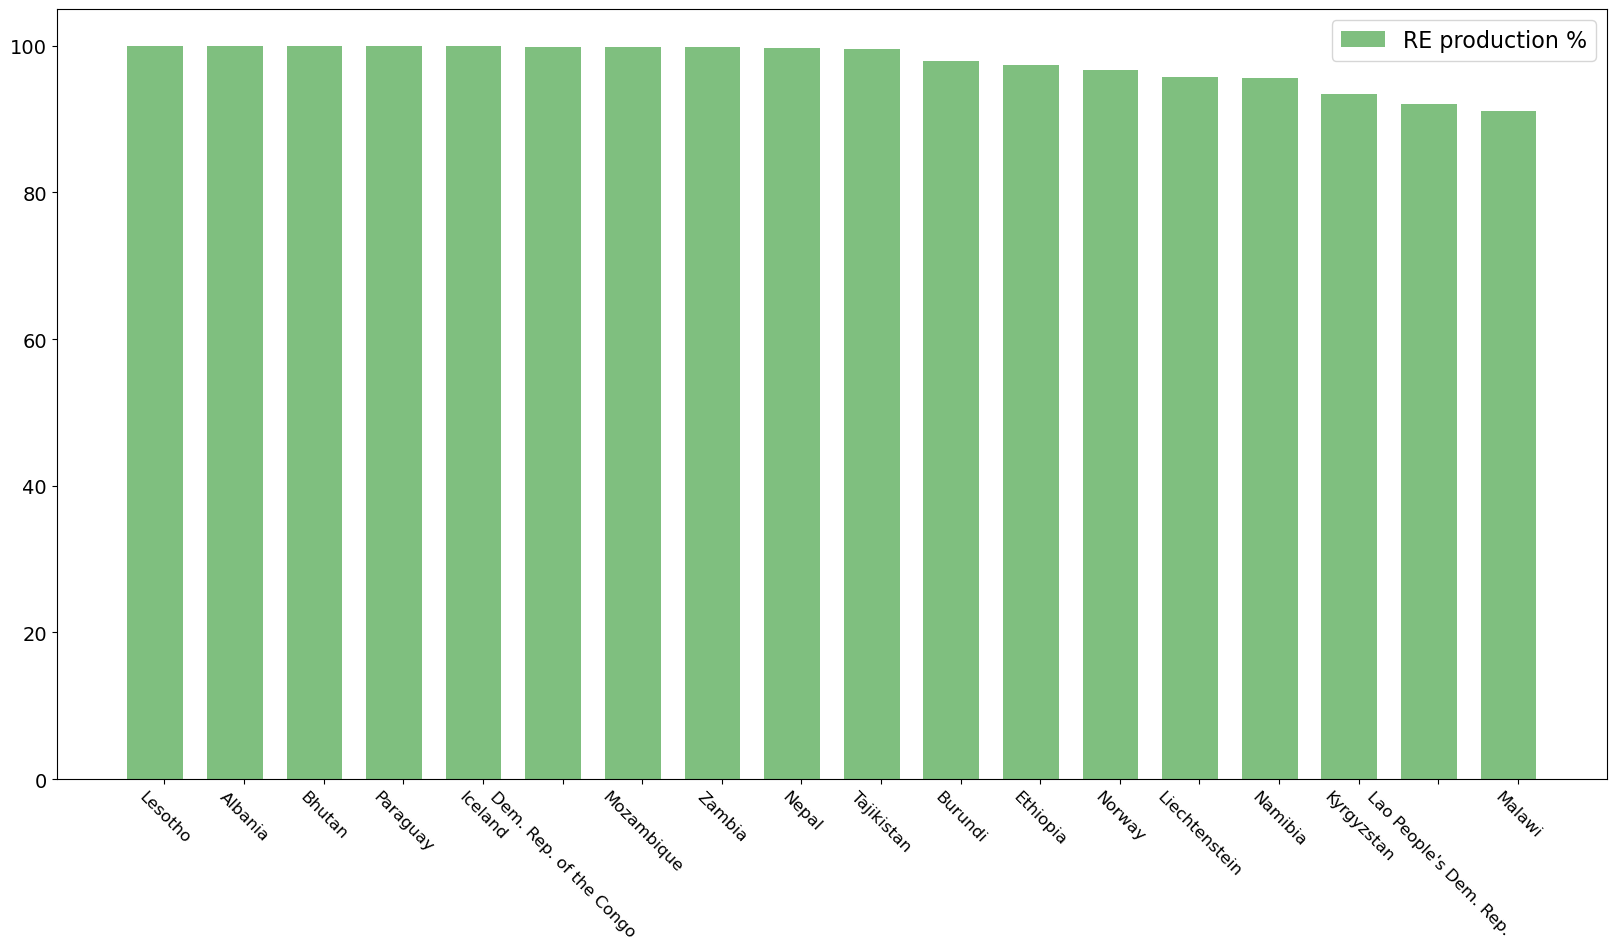

In [315]:
#Wykres liderów uzycia energii odnawialnej w całej produkcji energii
top_RE_production = sum_energy_df.sort_values(by = ['RE production %'], ascending=False)
top_RE_production = top_RE_production.loc[top_RE_production['RE production %'] >= 90.00]

bar_width =.7
plt.figure(figsize=(20,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
x = np.arange(len(top_RE_production["country_or_area"]))
plt.bar(x, top_RE_production["RE production %"], bar_width, color='g', capstyle= 'projecting', label="RE production %", alpha=.5)
#plt.bar(x , top_RE_production["RE production to demand %"], bar_width, color='y', label="RE production to demand %", alpha=.6)
#plt.axes()
plt.legend(fontsize=16)

plt.xticks(x + bar_width / 6, top_RE_production["country_or_area"], rotation = -45)
plt.show()

In [36]:
#Wykres liderów uzycia energii odnawialnej w całej produkcji energii
top_RE_production = sum_energy_df.sort_values(by = ['RE production %'], ascending=False)
top_RE_production = top_RE_production.loc[top_RE_production['RE production %'] >= 90.00]
top_RE_production

,country_or_area,exports,gross demand,gross production,imports,total geothermal production,total hydro production,"total production, autoproducer","total production, main activity",total solar production,"total tide, wave production",total wind production,total RE production,RE production %,RE production to demand %,sub
117,Lesotho,21.00,774.30,485.40,309.90,0.00,485.40,0.00,485.40,0.00,0.00,0.00,485.40,100.00,62.69,-37.31
1,Albania,0.00,7263.00,4725.00,2538.00,0.00,4725.00,0.00,4725.00,0.00,0.00,0.00,4725.00,100.00,65.06,-34.94
23,Bhutan,4890.10,1853.76,6826.70,36.70,0.00,6826.50,0.00,6826.70,0.00,0.00,0.00,6826.50,100.00,368.25,268.25
160,Paraguay,47662.72,12067.40,60234.61,0.00,0.00,60231.54,0.00,60234.61,0.00,0.00,0.00,60231.54,99.99,499.13,399.13
94,Iceland,0.00,17026.00,17549.00,0.00,5209.00,12337.00,0.00,17549.00,0.00,0.00,0.00,17546.00,99.98,103.05,3.07
56,Dem. Rep. of the Congo,48.00,7693.00,7595.00,626.00,0.00,7586.00,0.00,7595.00,0.00,0.00,0.00,7586.00,99.88,98.61,-1.27
140,Mozambique,9791.00,13469.00,15166.00,8304.00,0.00,15145.00,263.00,14903.00,0.00,0.00,0.00,15145.00,99.86,112.44,12.58
227,Zambia,980.00,11264.00,12368.00,163.00,0.00,12350.00,0.00,12368.00,0.00,0.00,0.00,12350.00,99.85,109.64,9.79
144,Nepal,4.00,4308.00,3543.00,793.00,0.00,3533.00,84.00,3459.00,0.00,0.00,0.00,3533.00,99.72,82.01,-17.71
202,Tajikistan,775.00,16246.00,16998.00,114.00,0.00,16924.00,0.00,16998.00,0.00,0.00,0.00,16924.00,99.56,104.17,4.61


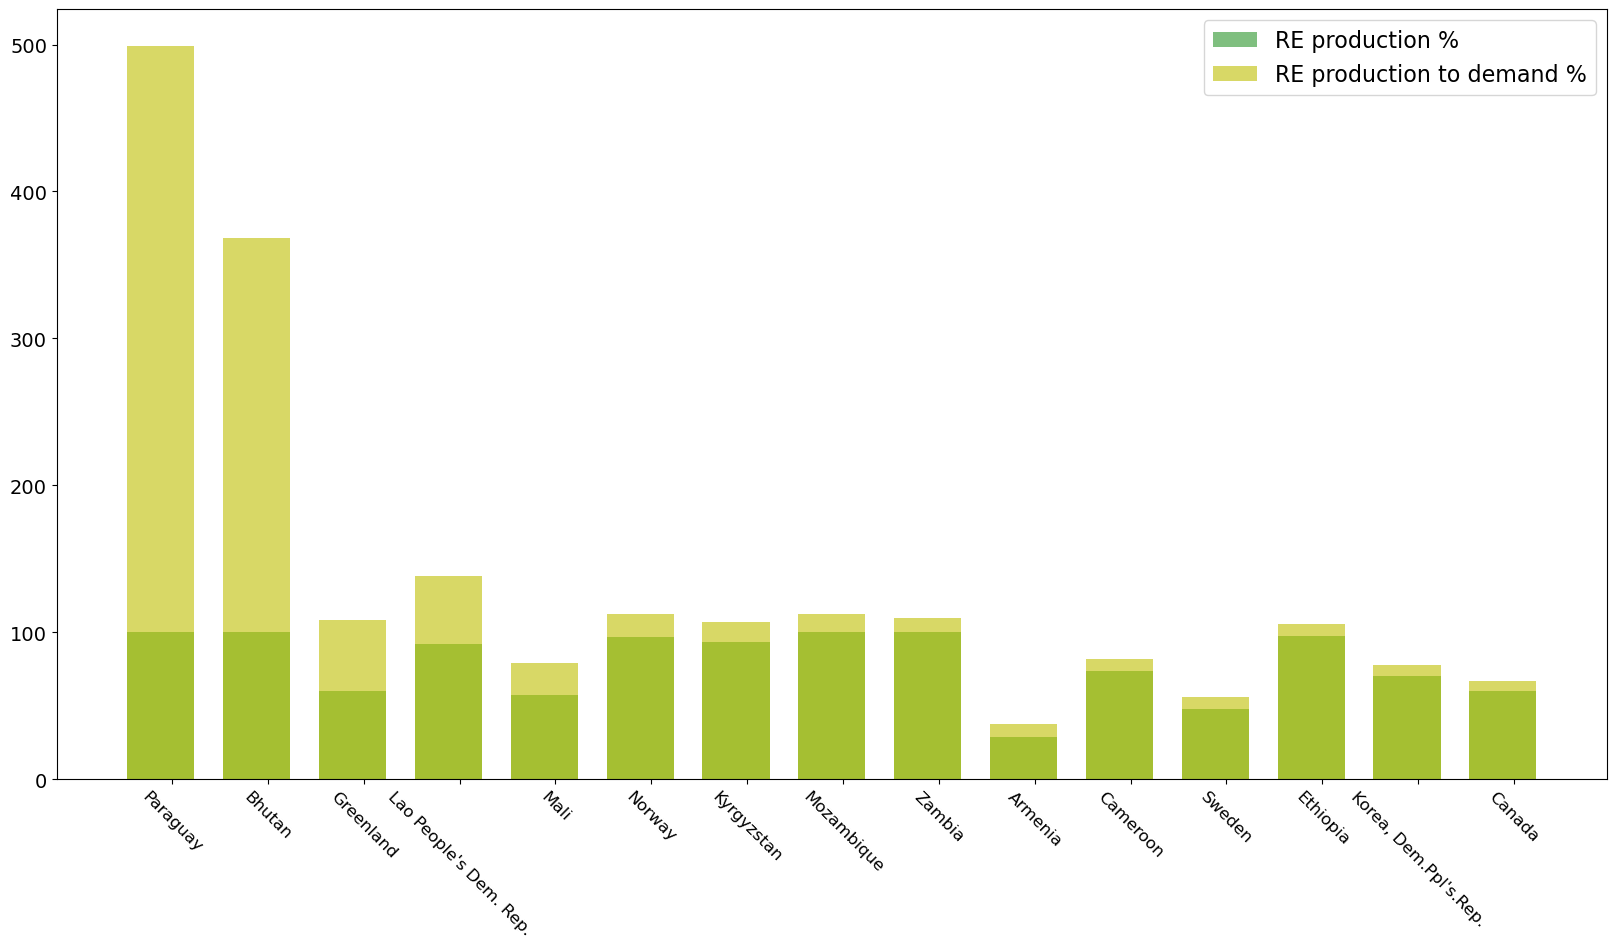

In [316]:
#Wykres liderów uzycia energii odnawialnej do zapotrzebowania i wytworzenia nadwyżki
top_10 = sum_energy_df.sort_values(by = ['sub'], ascending=False).head(15)

bar_width =.7
plt.figure(figsize=(20,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
x = np.arange(len(top_10["country_or_area"]))
plt.bar(x, top_10["RE production %"], bar_width, color='g', capstyle= 'projecting', label="RE production %", alpha=.5)
plt.bar(x , top_10["RE production to demand %"], bar_width, color='y', label="RE production to demand %", alpha=.6)
#plt.axes()
plt.legend(fontsize=16)

plt.xticks(x + bar_width / 6, top_10["country_or_area"], rotation = -45)
plt.show()

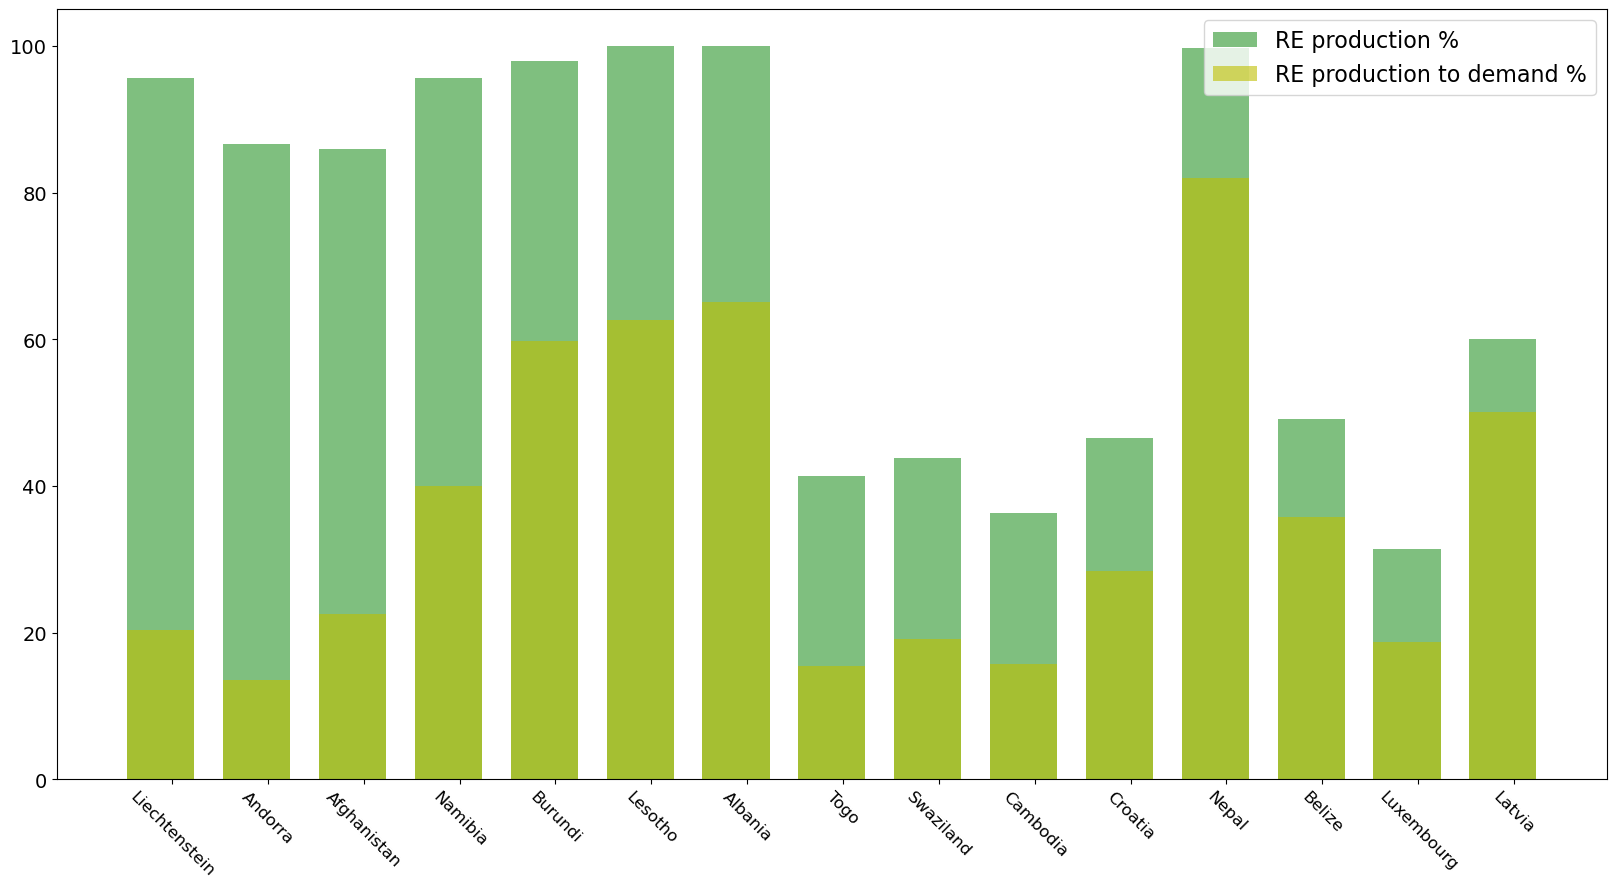

In [317]:
#Wykres najgorszych liderów uzycia energii odnawialnej do zapotrzebowania i wytworzenia nadwyżki
bottom_10 = sum_energy_df.sort_values(by = ['sub']).head(15)

bar_width =.7
plt.figure(figsize=(20,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
x = np.arange(len(bottom_10["country_or_area"]))
plt.bar(x, bottom_10["RE production %"], bar_width, color='g', capstyle= 'projecting', label="RE production %", alpha=.5)
plt.bar(x , bottom_10["RE production to demand %"], bar_width, color='y', label="RE production to demand %", alpha=.6)
#plt.axes()
plt.legend(fontsize=16)

plt.xticks(x + bar_width / 6, bottom_10["country_or_area"], rotation = -45)
plt.show()

# Coś dalej kombinuje - brudnopis